In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [36]:
num_states = 7
terminal_states = [0, 6]
alpha = 0.1
start_state = 3
num_episodes = 101
discount = 1
true_values = np.arange(0, 7)
true_values = true_values/6
true_values[6] = 0

In [37]:
def initializeV():
    V = np.zeros(num_states)
    for i in range(num_states):
        if i in terminal_states:
            continue
        V[i] = 0.5
    return V

def choose_action():
    prob = np.random.random()
    if (prob > 0.5):
        return 1
    return -1

def take_step(s, action):
    new_s = s + action
    if new_s == 6:
        return new_s, 1
    return new_s, 0

In [38]:
def td0(num_episodes):
#     print(alpha)
    V = initializeV()
    rmse_episode = np.zeros(num_episodes)
    for i in range(num_episodes):
        if i in episodes:
            plt.plot(V[1:6], label = str(i))
        s = start_state
        while True:
            action = choose_action()
            s_dash, reward = take_step(s, action)
            V[s] += alpha*(reward + discount*V[s_dash] - V[s])
            s = s_dash
            if s in terminal_states: 
                break
        rmse_episode[i] = np.sqrt(np.sum(np.power(true_values - V, 2))/5.0)
    return rmse_episode

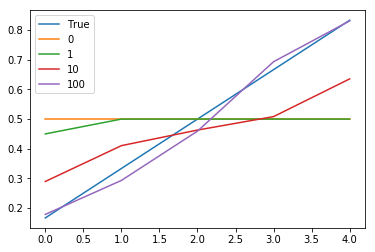

In [42]:
episodes = [0, 1, 10, 100]
V = initializeV()
true_values = np.arange(0, 7)
true_values = true_values/6
true_values[6] = 0
plt.figure()
plt.plot(true_values[1:6], label = "True")
td0(101)
plt.legend()
plt.show()

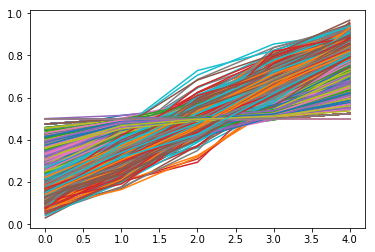

In [43]:
arr_td = []
num_runs = 100
episodes = [0, 1, 10, 100]
alpha_array_td = [0.1, 0.15, 0.05]
plt.figure()
for alpha_ in alpha_array_td:
    rmse_runs = np.zeros(num_episodes)
    alpha = alpha_
    for run in range(num_runs): 
        rmse = td0(num_episodes)
        rmse_runs += rmse
    rmse_runs/=num_runs
    arr_td.append(rmse_runs)

In [44]:
def alpha_mc(num_episodes):
#     print(alpha)
    V = initializeV()
    rmse_episode = np.zeros(num_episodes)
    for i in range(num_episodes):
        episode_cache = []
        s = start_state
#         episode_cache.append(s)
        while True:
            action = choose_action()
            s_dash, reward = take_step(s, action)
            episode_cache.append(s)
            s = s_dash
            if s in terminal_states: 
                break
        g = 0
        if (episode_cache[-1] == 6):
            g = 1
        for state in episode_cache:
            V[state] += alpha * (reward - V[state])
        rmse_episode[i] = np.sqrt(np.sum(np.power(true_values - V, 2))/5.0)
    return rmse_episode

In [45]:
arr = []
num_runs = 100
alpha_array_mc = [0.01, 0.02, 0.03, 0.04]
for alpha_ in alpha_array_mc:
    rmse_runs = np.zeros(num_episodes)
    alpha = alpha_
    for run in range(num_runs): 
        rmse = alpha_mc(num_episodes)
#         print(x)
        rmse_runs += rmse
    rmse_runs/=num_runs
    arr.append(rmse_runs)

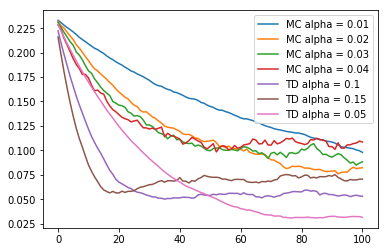

In [48]:
plt.figure()
num = 0
for rmse in arr:
    plt.plot(rmse, label = "MC alpha = " + str(alpha_array_mc[num]))
    num += 1
num = 0
for rmse in arr_td:
    plt.plot(rmse, label = "TD alpha = " + str(alpha_array_td[num]))
    num += 1
plt.legend()
plt.show()